In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline


In [4]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11490434/11490434 [==============================] - 13s 1us/step


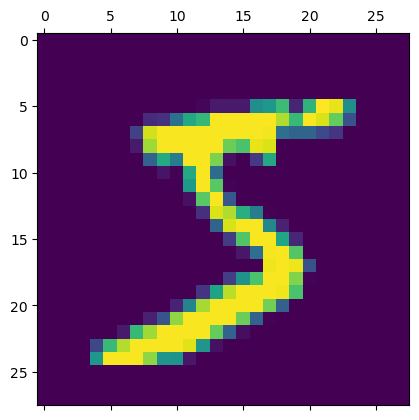

In [5]:
plt.matshow(x_train[0])

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 4ms/step - loss: 0.6451 - accuracy: 0.8356 - val_loss: 0.3608 - val_accuracy: 0.9040
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3413 - accuracy: 0.9039 - val_loss: 0.2997 - val_accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2939 - accuracy: 0.9168 - val_loss: 0.2659 - val_accuracy: 0.9267
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2643 - accuracy: 0.9260 - val_loss: 0.2445 - val_accuracy: 0.9309
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2418 - accuracy: 0.9325 - val_loss: 0.2266 - val_accuracy: 0.9363
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2228 - accuracy: 0.9384 - val_loss: 0.2099 - val_accuracy: 0.9410
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2066 - accuracy: 0.9425 - val_loss: 0.1988 - val_accuracy

In [15]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1652 - accuracy: 0.9506
Loss=0.165
Accuracy=0.951


<function matplotlib.pyplot.show(close=None, block=None)>

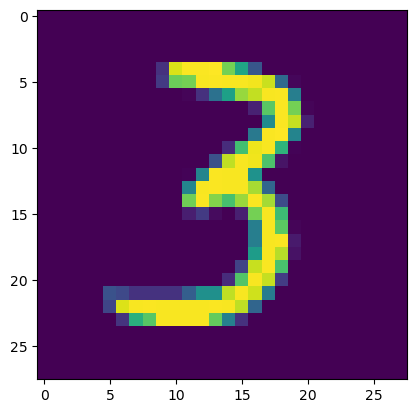

In [16]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [17]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 3ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 962    0    2    0    0    4    7    2    2    1]
 [   0 1116    2    2    0    1    3    2    9    0]
 [   5    2  978    8    6    1    9    8   12    3]
 [   0    1   16  953    0   14    1   11    9    5]
 [   1    1    3    2  928    0   13    3    3   28]
 [   7    1    2   20    2  833   13    0    8    6]
 [   6    3    2    3    7    8  927    1    1    0]
 [   1    7   22    5    4    1    0  965    4   19]
 [   5    2    6   18    7    9   10    9  904    4]
 [   7    7    2   13   19    3    1   13    4  940]], shape=(10, 10), dtype=int32)
